In [2]:
import pandas as pd
import numpy as np

from tqdm import tqdm

In [3]:
df = pd.read_csv ('districts.csv')
df_state = pd.read_csv('states.csv')

In [4]:
df_state

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
0,2020-01-30,Kerala,1,0,0,0,NaN
1,2020-01-30,India,1,0,0,0,NaN
2,2020-02-02,Kerala,2,0,0,0,NaN
3,2020-02-02,India,2,0,0,0,NaN
4,2020-02-03,Kerala,3,0,0,0,NaN
...,...,...,...,...,...,...,...
15611,2021-05-20,Tripura,43493,36658,450,23,825191.0
15612,2021-05-20,India,26030674,22705901,291365,10453,322356187.0
15613,2021-05-20,Uttar Pradesh,1651530,1516508,18588,0,45822509.0
15614,2021-05-20,Uttarakhand,303940,224535,5484,5278,4401501.0


In [5]:
df.State[100]

'Haryana'

In [6]:
df.Date[100]

'2020-04-26'

In [8]:
eps = 0.0000001
df['log-confirmed'] = np.log(df['Confirmed']+eps)

Unknown
Anantapur
Chittoor
East Godavari


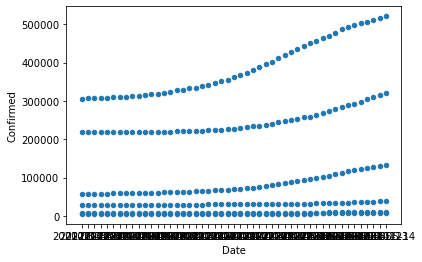

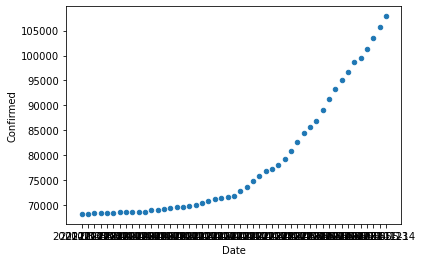

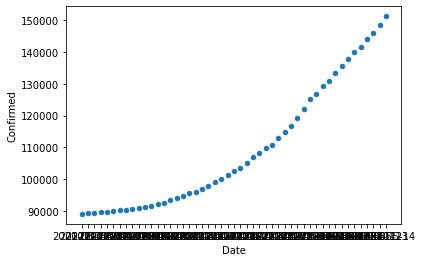

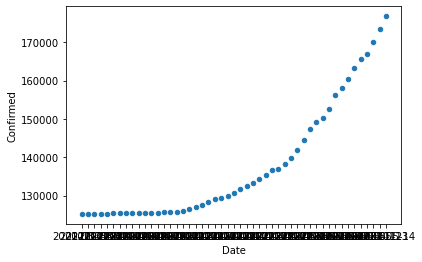

In [9]:
counter = 0
for district in df.District: 
    print(district)
    counter+=1
    df.loc[(df.District==district) & (df.Date > '2021-03-26')].plot(x ='Date', y='Confirmed', kind = 'scatter')
    if counter > 3:
        break

 50%|█████     | 19/38 [00:01<00:01, 17.11it/s]/Users/aliseyfi/opt/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
100%|██████████| 38/38 [00:02<00:00, 16.03it/s]


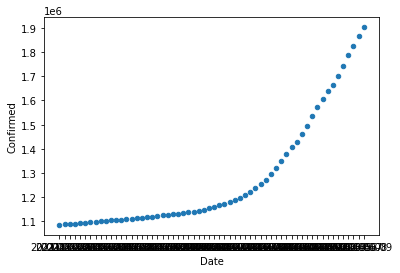

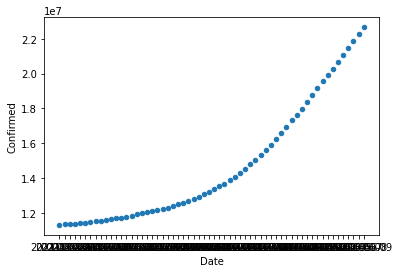

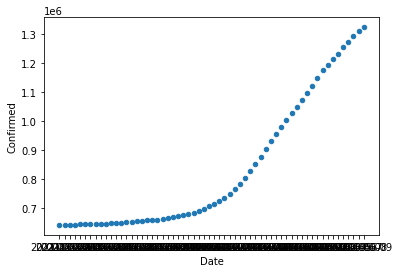

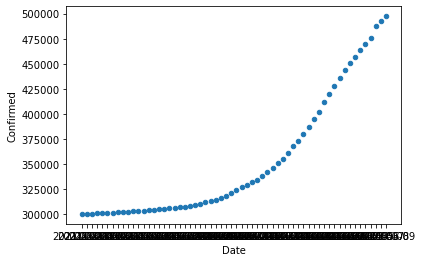

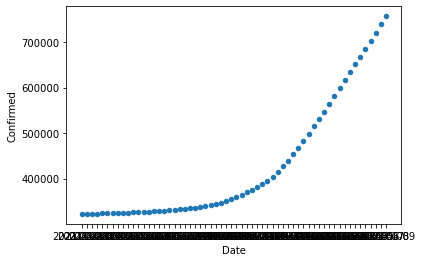

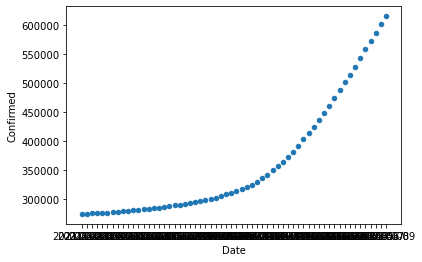

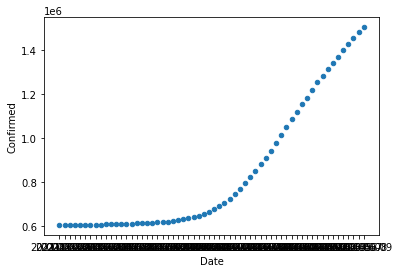

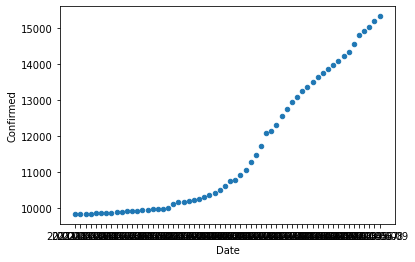

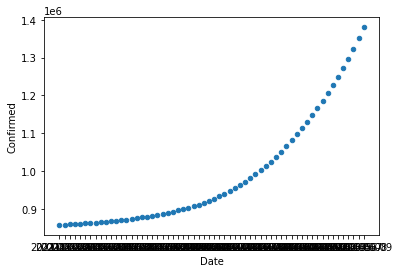

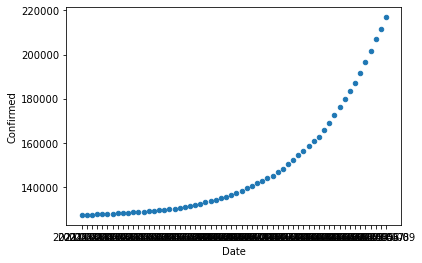

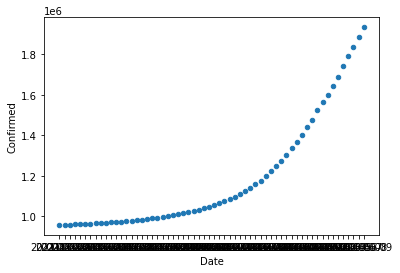

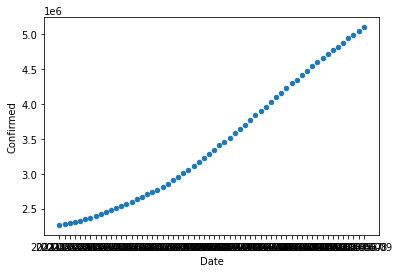

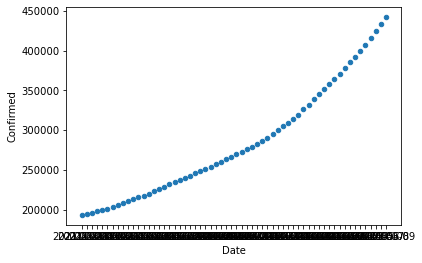

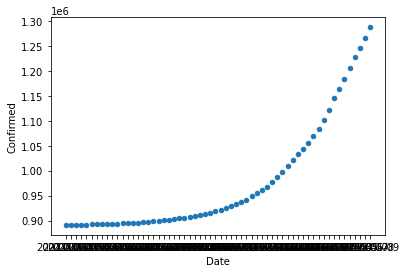

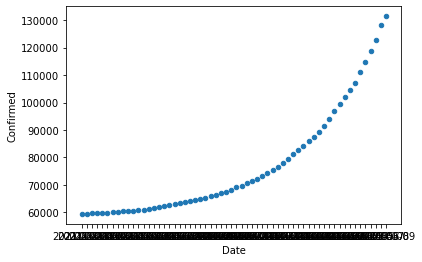

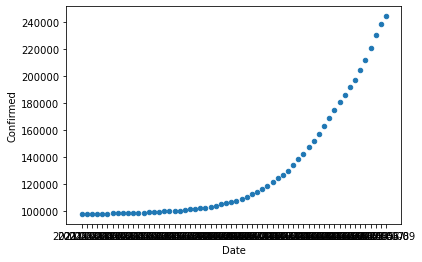

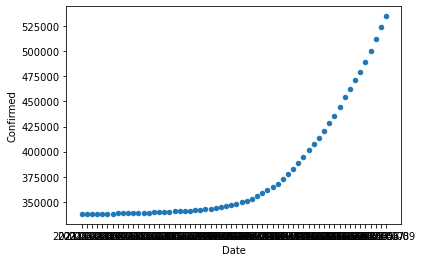

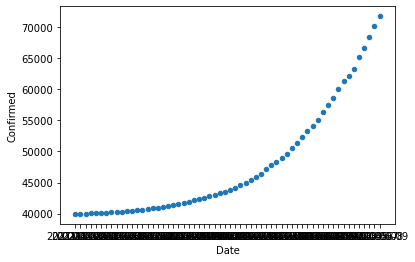

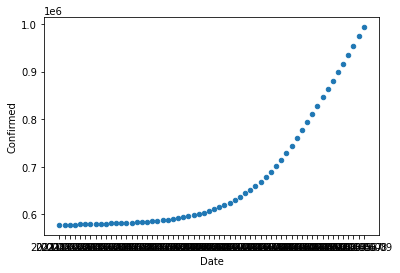

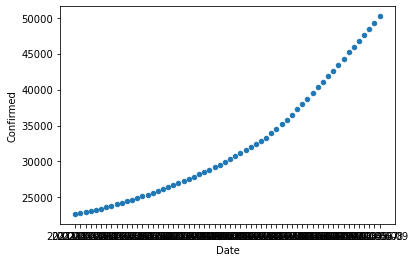

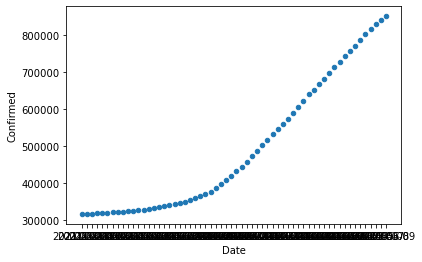

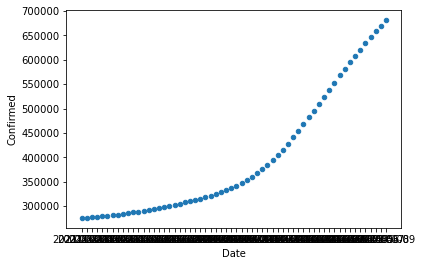

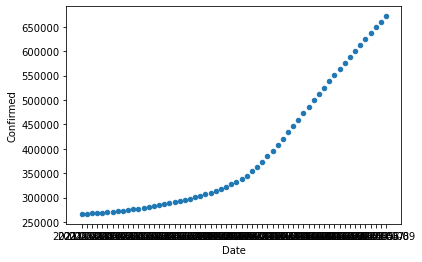

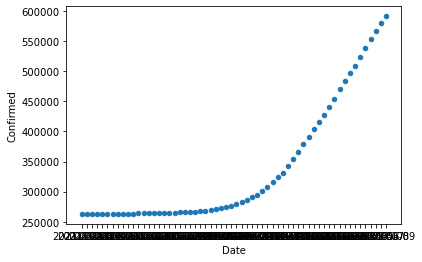

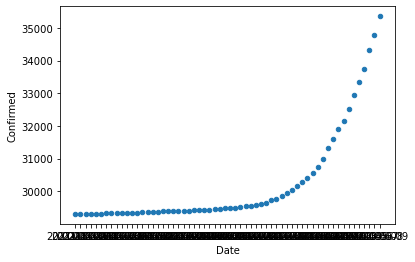

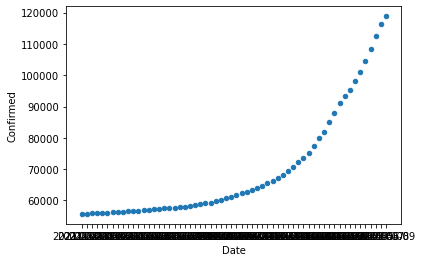

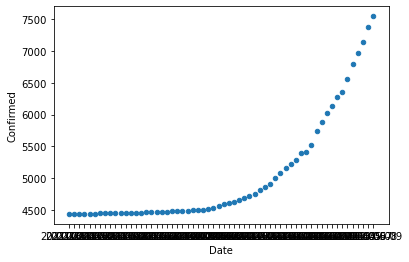

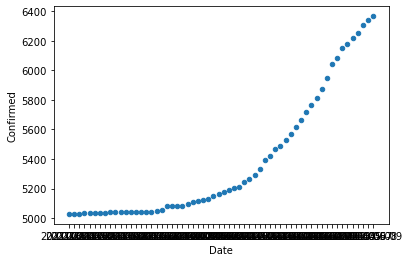

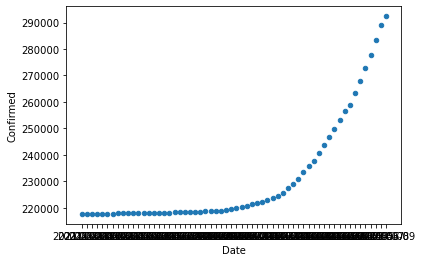

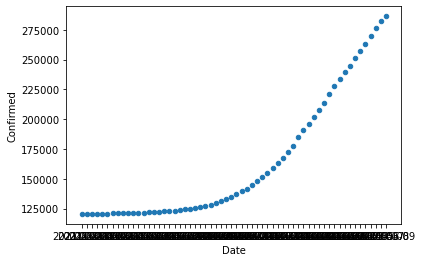

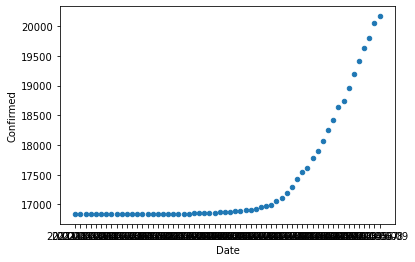

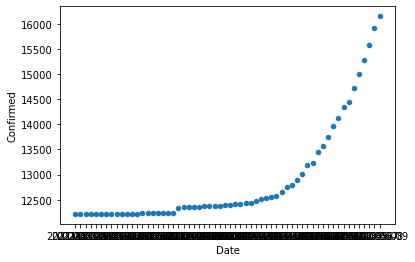

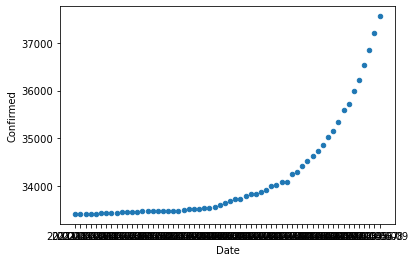

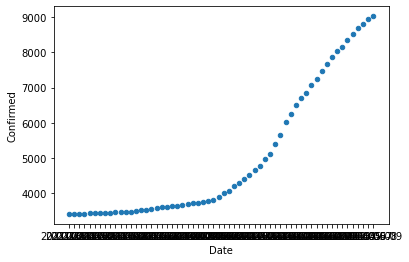

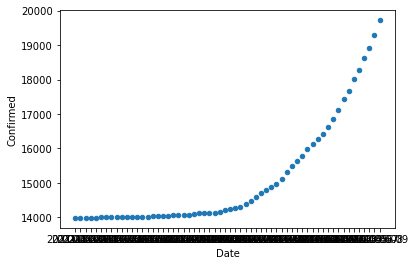

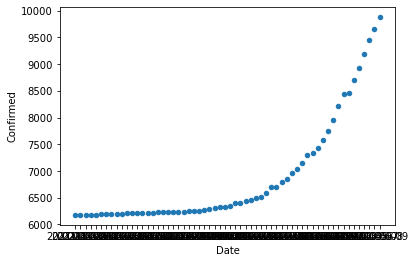

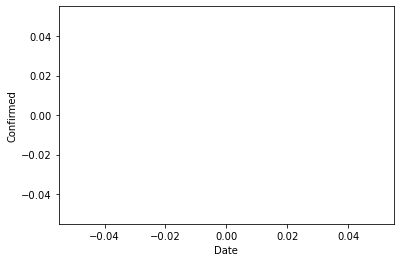

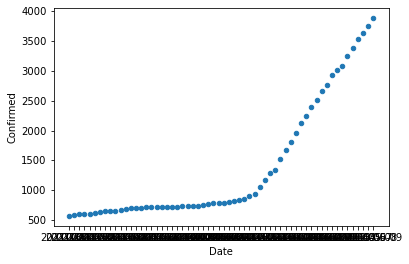

In [9]:
for state in tqdm(df_state.State.unique()): 
    df_state.loc[(df_state.State==state) & (df_state.Date > '2021-03-10') & (df_state.Date < '2021-05-10')].plot(x ='Date', y='Confirmed', kind = 'scatter')

In [10]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

new_dataframe = df.loc[(df.District=='Chittoor') & (df.Date > '2021-03-26')]
y = np.array(new_dataframe['Confirmed'])
x = np.arange(len(y))
popt, pcov =curve_fit(func, x , y ,p0=(4, 0.1,0.2))

In [11]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

new_dataframe_state = df_state.loc[(df_state.State==state) & (df_state.Date > '2021-03-20') & (df_state.Date < '2021-05-10')]
y = np.array(new_dataframe_state['Confirmed'])
x = np.arange(len(y))
popt, pcov =curve_fit(func, x , y ,p0=(4, 0.1,0.2))

[ 666  691  697  699  708  714  714  715  715  718  723  726  733  740
  741  744  751  770  778  784  794  799  813  834  845  901  945 1051
 1165 1282 1335 1526 1671 1805 1962 2126 2247 2401 2504 2662 2767 2923
 3010 3080 3249 3376 3528 3629 3756 3881]


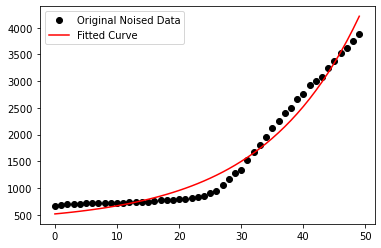

In [12]:
import matplotlib.pyplot as plt

plt.figure()
print(y)
plt.plot(x, y, 'ko', label="Original Noised Data")
plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

In [13]:
popt

array([ 1.70888062e+02, -6.36640275e-02,  3.45587529e+02])

In [21]:
from scipy.optimize import curve_fit
from tqdm import tqdm

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

counter = 0
r = []
for district in tqdm(df.District): 
    counter +=1
    if counter >1000:
        break
    if district == 'Other Region':
        continue
    new_dataframe = df.loc[(df.District==district) & (df.Date > '2021-03-26')]
    y = np.array(new_dataframe['Confirmed'])
    if abs(y[1] - y[0]) > 1000:
        continue
    x = np.arange(len(y))
    try:
        popt, pcov = curve_fit(func, x , y ,p0=(1.5e3, -7.0e-2,6.5e4))
        r.append(-popt[1])
    except:
        continue

  0%|          | 86/246133 [00:02<1:33:51, 43.69it/s]/Users/aliseyfi/opt/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
  0%|          | 129/246133 [00:03<1:40:04, 40.97it/s]


KeyboardInterrupt: 

In [130]:
np.mean(r)

0.04642302614839393

In [14]:
from scipy.optimize import curve_fit
from tqdm import tqdm

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

r = []
for state in tqdm(df_state.State.unique()): 
    new_dataframe_state = df_state.loc[(df_state.State==state) & (df_state.Date > '2021-03-20') & (df_state.Date < '2021-05-10')]
    y = np.array(new_dataframe_state['Confirmed'])
    x = np.arange(len(y))
    try:
        popt, pcov = curve_fit(func, x , y ,p0=(1.5e3, -7.0e-2,6.5e4))
        r.append(-popt[1])
    except:
        continue

  0%|          | 0/38 [00:00<?, ?it/s]<ipython-input-14-11771bcee854>:5: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
100%|██████████| 38/38 [00:00<00:00, 212.82it/s]


In [30]:
r = pd.DataFrame(r)
r

,0
0,0.070049
1,0.043285
2,0.051932
3,0.058735
4,0.027375
5,0.067662
6,0.067046
7,0.073513
8,0.064805
9,0.070114


<AxesSubplot:>

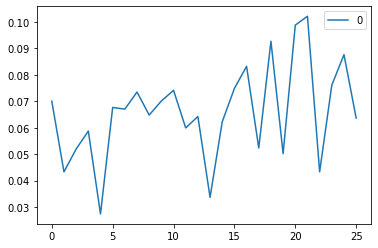

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

r.plot()

In [56]:
r_mean = np.mean(r[(r>0.04) & (r<0.1)])[0]

In [50]:
r_mean

0.06741980300304935

In [51]:
R = np.exp(6.5*r_mean)

In [52]:
R

1.5499593728448815